## LESSON GOALS
Learn how to use linear regression to make predictions

Learn how to use logistic regression to work on classification problems
## INTRODUCTION
We have already learned about how two variables can be related through correlation (two variables move together: both increase and decrease together, or one increases while the other decreases). 

In regression analysis, we will learn about how groups of variables can be correlated to a single target, or outcome, variable, and how these relationships can be used to predict the future values of that outcome. We call the variables that are correlated with the outcome independent, or X variables, and the outcome variable the dependent, or Y variable. 

Regression analysis is one of the most common techniques used to make predictions. Depending on the question we would like to answer, and the format of the outcome variable, regression analysis can be used to both make value predictions (what will my income be next year?) and classifications (based on the qualities of a song, will I like it or not?). The relationship between the X variables and the Y variables can also take different formats. The case that an increase or decrease in an X variable always produces the same, fixed increase or decrease in the Y variable is called linear regression. When this relationship is not always the same we classify it as non-linear regression. 

In some cases, there is only one predictor variable, which makes the relation a simple (univariate) linear regression. In other cases, there are more than one predictor variables which is called multiple (multivariate) linear regression.

Linear Regression - The relationship between X and Y is linear 

![Drag Racing](https://studio.ironhack.school/asset-v1:IRONHACK+DAFT+202005_AMS+type@asset+block@Screenshot_2020-05-28_at_15.20.57.png)

Non-Linear Regression - The relationship between X and Y is non-linear 


![Drag Racing](https://studio.ironhack.school/asset-v1:IRONHACK+DAFT+202005_AMS+type@asset+block@Screenshot_2020-05-28_at_15.20.37.png)


## SIMPLE LINEAR REGRESSION (UNIVARIATE ANALYSIS)

![Drag Racing](https://studio.ironhack.school/asset-v1:IRONHACK+DAFT+202005_AMS+type@asset+block@Screenshot_2020-05-28_at_15.24.51.png)

Univariate analysis, or simple linear regression, is when only one X (independent) variable is used to predict the outcome variable. In the case of linear univariate analysis, we can model this relationship using a straight line.

linear equation

Where:

+ X - Independent variable
+ Y - Dependent variable
+ b1 - the quantity of change (positive or negative) that one can expect from a one unit increase in X. If we increase X by one unit, Y will increase by b1 units. This is also sometimes referred to as ‘slope’. 
+ b0 - intercept (or constant). This is the value at which the regression line crosses the y-axis. 

In this exercise, we will use data from a Fitbit, a personal health monitor. This dataset includes information on an individual’s activity levels (steps, calories, heart rate), exercise, sleep, as well as assorted community and personal profile information added by the user. Here we will use the Fitbit2.csv file and look at two specific columns related to sleep quality, ‘MinutesOfBeingAwake’ and ‘NumberOfAwakings’. Below, we use the Python code to build a scatter plot of the two columns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns1

In [2]:
vehicles = pd.read_csv('FITBIT2.csv')

FileNotFoundError: [Errno 2] File FITBIT2.csv does not exist: 'FITBIT2.csv'

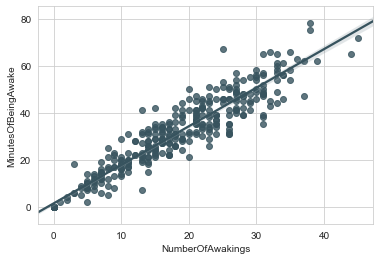

In [76]:
data = pd.read_csv('Fitbit2.csv') 
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

In [77]:
from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202


In [78]:
slope

1.6405141436199793

In [79]:
intercept

1.4381033523783202

In [80]:
r_value

0.9518168284473626

In [81]:
p_value

1.8851918729069212e-189

In [82]:
import statsmodels.api as sm
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()


/Users/marcherrera/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 16 Jan 2021   Prob (F-statistic):          1.89e-189
Time:                         10:20:16   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
for col in data.columns:
    print(col)

Date
Calorie burned
Steps
Distance
Floors
Minutes Sedentary
Minutes Lightly Active
Minutes Fairly Active
Minutes Very Active
Activity Calories
MinutesOfSleep
MinutesOfBeingAwake
NumberOfAwakings
LengthOfRestInMinutes
Distance_miles
Days
Days_encoded
Work_or_Weekend
Hours Sleep
Sleep efficiency
Yesterday_sleep
Yesterday_sleep_efficiency
Months
Months_encoded


In [84]:
cor_matrix = data.corr()
cor_matrix

Calorie burned     Steps  Distance    Floors  \
Calorie burned                    1.000000  0.255305  0.292790  0.130757   
Steps                             0.255305  1.000000  0.779678  0.306511   
Distance                          0.292790  0.779678  1.000000  0.382940   
Floors                            0.130757  0.306511  0.382940  1.000000   
Minutes Sedentary                 0.125353  0.076906  0.160632  0.057812   
Minutes Lightly Active            0.209540  0.393010  0.455272 -0.085992   
Minutes Fairly Active             0.188256  0.303244  0.348113  0.278408   
Minutes Very Active               0.197881  0.571452  0.759310  0.399503   
Activity Calories                -0.130758 -0.160568 -0.246853 -0.155532   
MinutesOfSleep                    0.011485  0.130986  0.129442  0.069464   
MinutesOfBeingAwake               0.041999  0.124846  0.130447  0.064587   
NumberOfAwakings                  0.030490  0.106591  0.091095  0.043459   
LengthOfRestInMinutes             0.017460  0.133405  0.134550  0.075864   
Distance_miles                    0.292790  0.779678  1.000000  0.382940   
Days_encoded                     -0.041630 -0.024671 -0.056472 -0.243848   
Work_or_Weekend                   0.064943  0.006498  0.069438  0.296749   
Hours Sleep                       0.011485  0.130986  0.129442  0.069464   
Sleep efficiency                  0.040965  0.128463  0.126663  0.057192   
Yesterday_sleep                   0.048411  0.089991  0.107858  0.111600   
Yesterday_sleep_efficiency        0.021207  0.083499  0.075439  0.092766   
Months_encoded                    0.005841 -0.097077 -0.122106 -0.032347   

                            Minutes Sedentary  Minutes Lightly Active  \
Calorie burned                       0.125353                0.209540   
Steps                                0.076906                0.393010   
Distance                             0.160632                0.455272   
Floors                               0.057812               -0.085992   
Minutes Sedentary                    1.000000                0.217021   
Minutes Lightly Active               0.217021                1.000000   
Minutes Fairly Active                0.084137                0.014288   
Minutes Very Active                  0.105963               -0.034425   
Activity Calories                   -0.161446               -0.219892   
MinutesOfSleep                       0.204242                0.105048   
MinutesOfBeingAwake                  0.200589                0.096107   
NumberOfAwakings                     0.178387                0.087150   
LengthOfRestInMinutes                0.208539                0.105406   
Distance_miles                       0.160632                0.455272   
Days_encoded                        -0.069168                0.202433   
Work_or_Weekend                      0.071185               -0.197896   
Hours Sleep                          0.204242                0.105048   
Sleep efficiency                     0.251996                0.101216   
Yesterday_sleep                      0.069396                0.020973   
Yesterday_sleep_efficiency           0.058520                0.040472   
Months_encoded                      -0.107068               -0.066958   

                            Minutes Fairly Active  Minutes Very Active  \
Calorie burned                           0.188256             0.197881   
Steps                                    0.303244             0.571452   
Distance                                 0.348113             0.759310   
Floors                                   0.278408             0.399503   
Minutes Sedentary                        0.084137             0.105963   
Minutes Lightly Active                   0.014288            -0.034425   
Minutes Fairly Active                    1.000000             0.337839   
Minutes Very Active                      0.337839             1.000000   
Activity Calories                       -0.204562            -0.187309   
MinutesO

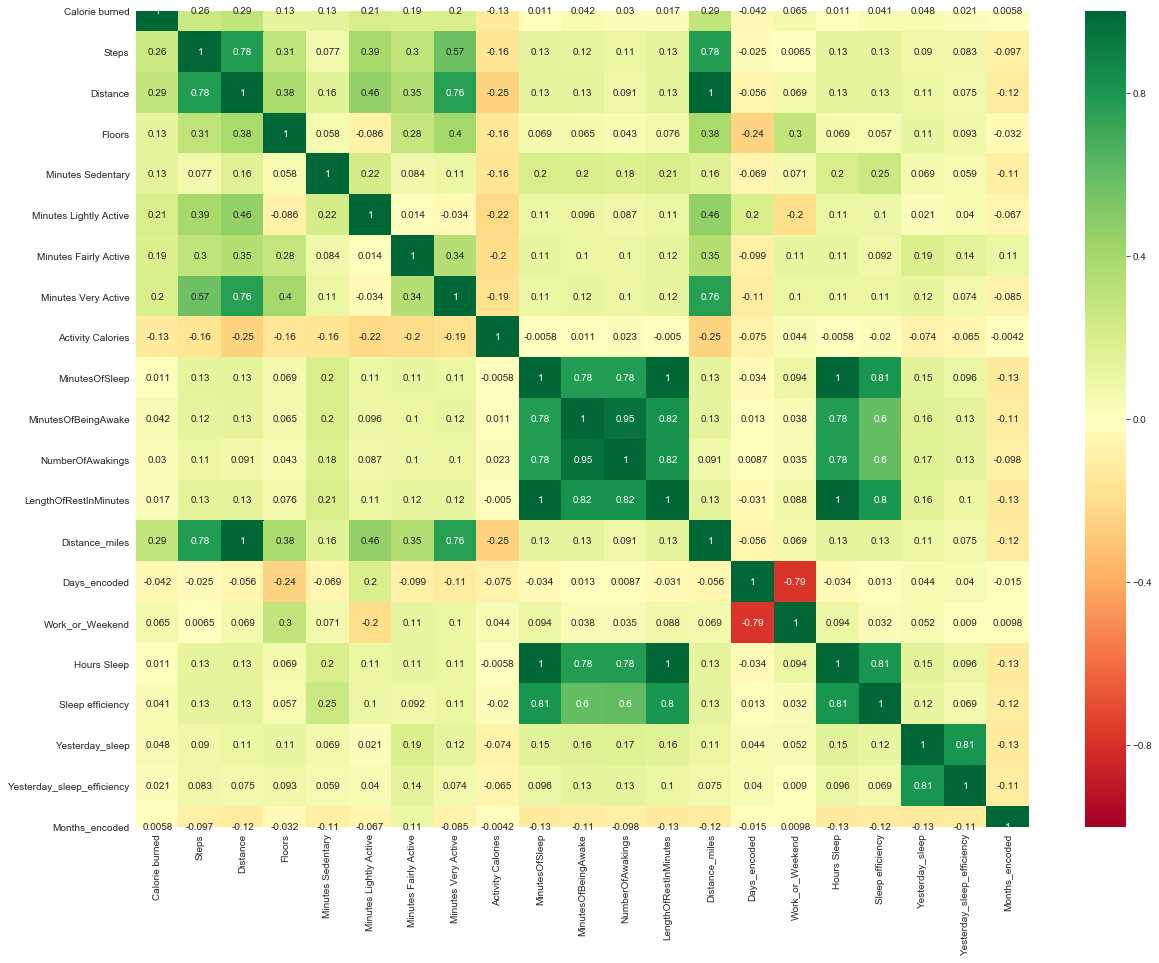

In [85]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(cor_matrix, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

In [87]:
data[['Work_or_Weekend','Days_encoded']].head(10)

Work_or_Weekend  Days_encoded
0                1           4.0
1                0           5.0
2                0           6.0
3                1           0.0
4                1           1.0
5                1           2.0
6                1           3.0
7                1           4.0
8                0           5.0
9                0           6.0

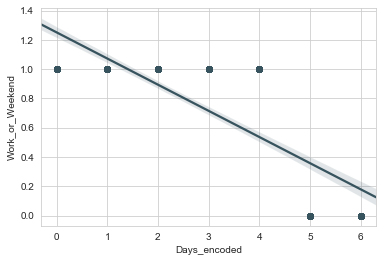

In [88]:
sns.regplot(x="Days_encoded", y="Work_or_Weekend", data=data)

In [89]:
data.groupby(['Days_encoded']).mean()[['Work_or_Weekend']]

Work_or_Weekend
Days_encoded                 
0.0                       1.0
1.0                       1.0
2.0                       1.0
3.0                       1.0
4.0                       1.0
5.0                       0.0
6.0                       0.0

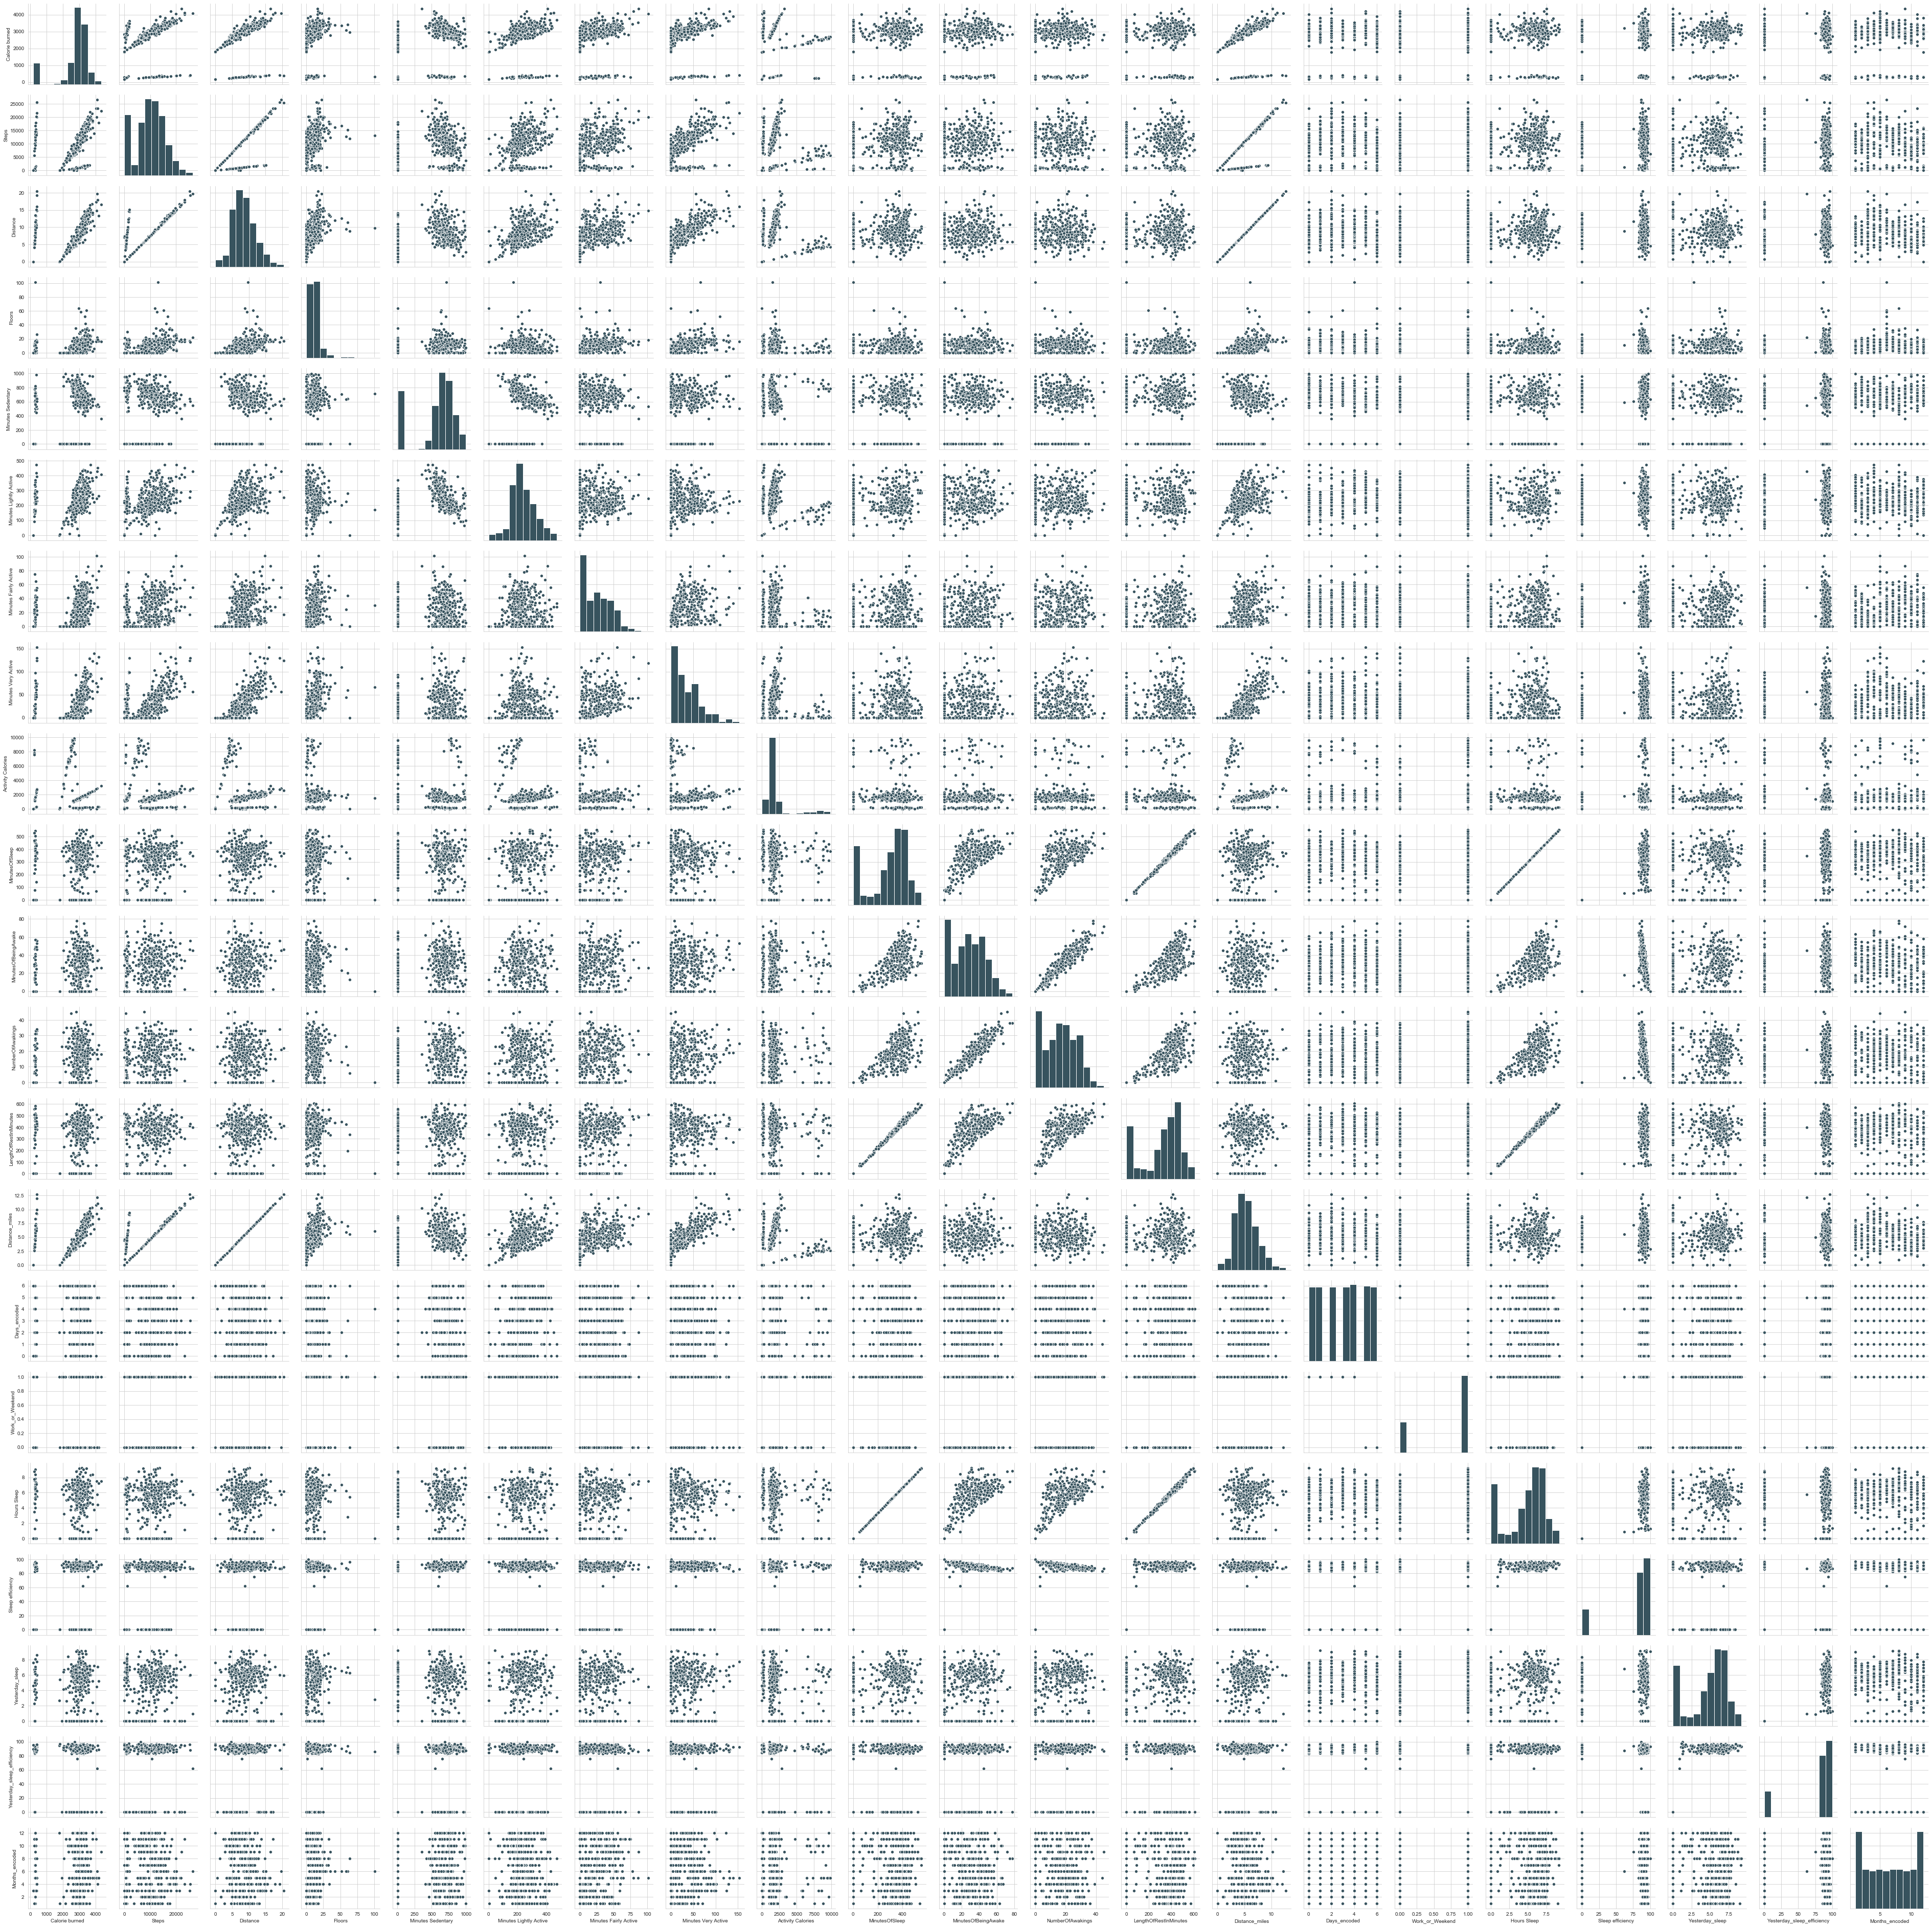

In [90]:
sns.pairplot(data)

## How to pick best predictors?

In [ ]:
data.columns

In [91]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.utils import resample


X = data[['Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months_encoded']]
y = data['Calorie burned']

p = len(X.columns)

def out_of_bag(X, y, X_train, y_train):
    X_test, y_test = [], []

    for i in range(len(X)):
        if X.index[i] not in X_train.index:
            X_test.append(X.iloc[i])
            y_test.append(y.iloc[i])
            
    return X_test, y_test

def do_bootstrap(X, y, n_iterations, model = LinearRegression()):
    mses = []
    
    for i in range(n_iterations):
        X_train, y_train = resample(X, y, random_state = i)
        X_test, y_test = out_of_bag(X, y, X_train, y_train)
        tmodel = model.fit(X_train, y_train)
        mses.append(mean_squared_error(y_test, tmodel.predict(X_test)))
    return np.mean(mses)
best_combination = None
best_mse = None

for i in tqdm(range(1, p + 1)):
    comb = combinations(X.columns, i)    
    
    for c in comb:
        cX = X[list(c)]
        mse = do_bootstrap(cX, y, 15)
        
        if best_mse is None or mse < best_mse:
            print("Combination: {}, MSE: {:.3f}".format(", ".join(list(c)), mse))
            print("\tNew best!")
            best_combination = c
            best_mse = mse



  0%|          | 0/20 [00:00<?, ?it/s]

Combination: Steps, MSE: 823923.962
	New best!
Combination: Distance, MSE: 798123.042
	New best!



  5%|▌         | 1/20 [00:16<05:07, 16.19s/it]

Combination: Distance, Minutes Sedentary, MSE: 794449.256
	New best!
Combination: Distance, Minutes Fairly Active, MSE: 794013.979
	New best!



 10%|█         | 2/20 [02:29<15:23, 51.31s/it]

KeyboardInterrupt: 

In [93]:
X = data[['Distance','Minutes Fairly Active']]
Y = data['Calorie burned']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Calorie burned   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     18.93
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.51e-08
Time:                        10:58:08   Log-Likelihood:                -3005.2
No. Observations:                 367   AIC:                             6016.
Df Residuals:                     364   BIC:                             6028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2031.5248    125.004     16.252      0.000    1785.703    2277.346
Distance                 69.4893     14.299      4.860      0.000      41.370      97.609
Minutes Fairly Active     4.4300      2.400      1.846      0.066      -0.289       9.149
==============================================================================
Omnibus:                      186.920   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.293
Skew:                          -2.433   Prob(JB):                    1.53e-144
Kurtosis:                       7.430   Cond. No.                         93.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
X = data[['Distance']]
Y = data['Calorie burned']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Calorie burned   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     34.22
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.09e-08
Time:                        10:58:20   Log-Likelihood:                -3006.9
No. Observations:                 367   AIC:                             6018.
Df Residuals:                     365   BIC:                             6026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2068.8659    123.763     16.716      0.000    1825.487    2312.245
Distance      78.6788     13.449      5.850      0.000      52.231     105.126
==============================================================================
Omnibus:                      185.635   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.849
Skew:                          -2.416   Prob(JB):                    1.04e-142
Kurtosis:                       7.406   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X = data[['Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months_encoded']]
Y = data['Calorie burned']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Calorie burned   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.787
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           0.000154
Time:                        11:01:58   Log-Likelihood:                -2998.6
No. Observations:                 367   AIC:                             6035.
Df Residuals:                     348   BIC:                             6109.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1683.6818    334.052      5.040      0.000    1026.667    2340.696
Steps                          0.0136      0.013      1.009      0.313      -0.013       0.040
Distance                      13.3801     27.022      0.495      0.621     -39.768      66.528
Floors                         1.0668      5.371      0.199      0.843      -9.497      11.631
Minutes Sedentary              0.1756      0.170      1.032      0.303      -0.159       0.510
Minutes Lightly Active         1.5904      0.893      1.781      0.076      -0.166       3.347
Minutes Fairly Active          4.0907      2.621      1.561      0.120      -1.064       9.246
Minutes Very Active            1.3160      3.129      0.421      0.674      -4.839       7.471
Activity Calories             -0.0138      0.024     -0.567      0.571      -0.062       0.034
MinutesOfSleep                -9.9397      9.496     -1.047      0.296     -28.616       8.737
MinutesOfBeingAwake           -4.1790     11.700     -0.357      0.721     -27.191      18.834
NumberOfAwakings              -2.2889     14.772     -0.155      0.877     -31.343      26.765
LengthOfRestInMinutes          8.8829      9.440      0.941      0.347      -9.683      27.449
Distance_miles                 8.3140     16.791      0.495      0.621     -24.710      41.339
Days_encoded                  14.2667     38.861      0.367      0.714     -62.166      90.699
Work_or_Weekend              212.2022    176.139      1.205      0.229    -134.228     558.633
Hours Sleep                   -0.1657      0.158     -1.047      0.296      -0.477       0.146
Sleep efficiency               1.9372      2.418      0.801      0.424      -2.819       6.693
Yesterday_sleep               13.9979     31.421      0.445      0.656     -47.801      75.797
Yesterday_sleep_efficiency    -1.4593      2.386     -0.611      0.541      -6.153       3.234
Months_encoded                 5.7057     13.906      0.410      0.682     -21.644      33.055
==============================================================================
Omnibus:                      186.802   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.714
Skew:                          -2.423   Prob(JB):                    1.02e-145
Kurtosis:                       7.491   Cond. No.                     1.22e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
data.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [97]:
data[['Days']]

Days
0       Friday
1     Saturday
2       Sunday
3       Monday
4      Tuesday
..         ...
362    Tuesday
363  Wednesday
364   Thursday
365     Friday
366   Saturday

[367 rows x 1 columns]

In [98]:
data[['Days1']]= data[['Days']]
datanew=pd.get_dummies(data, columns=['Days'])

In [99]:
datanew.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days_encoded', 'Work_or_Weekend', 'Hours Sleep',
       'Sleep efficiency', 'Yesterday_sleep', 'Yesterday_sleep_efficiency',
       'Months', 'Months_encoded', 'Days1', 'Days_Friday', 'Days_Monday',
       'Days_Saturday', 'Days_Sunday', 'Days_Thursday', 'Days_Tuesday',
       'Days_Wednesday'],
      dtype='object')

In [100]:
datanew[['Days1','Days_Friday', 'Days_Monday',
       'Days_Saturday', 'Days_Sunday', 'Days_Thursday', 'Days_Tuesday',
       'Days_Wednesday']]

Days1  Days_Friday  Days_Monday  Days_Saturday  Days_Sunday  \
0       Friday            1            0              0            0   
1     Saturday            0            0              1            0   
2       Sunday            0            0              0            1   
3       Monday            0            1              0            0   
4      Tuesday            0            0              0            0   
..         ...          ...          ...            ...          ...   
362    Tuesday            0            0              0            0   
363  Wednesday            0            0              0            0   
364   Thursday            0            0              0            0   
365     Friday            1            0              0            0   
366   Saturday            0            0              1            0   

     Days_Thursday  Days_Tuesday  Days_Wednesday  
0                0             0               0  
1                0             0               0  
2                0             0               0  
3                0             0               0  
4                0             1               0  
..             ...           ...             ...  
362              0             1               0  
363              0             0               1  
364              1             0               0  
365              0             0               0  
366              0             0               0  

[367 rows x 8 columns]

### Check out the Data

In [101]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [102]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [103]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [104]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [105]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [106]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

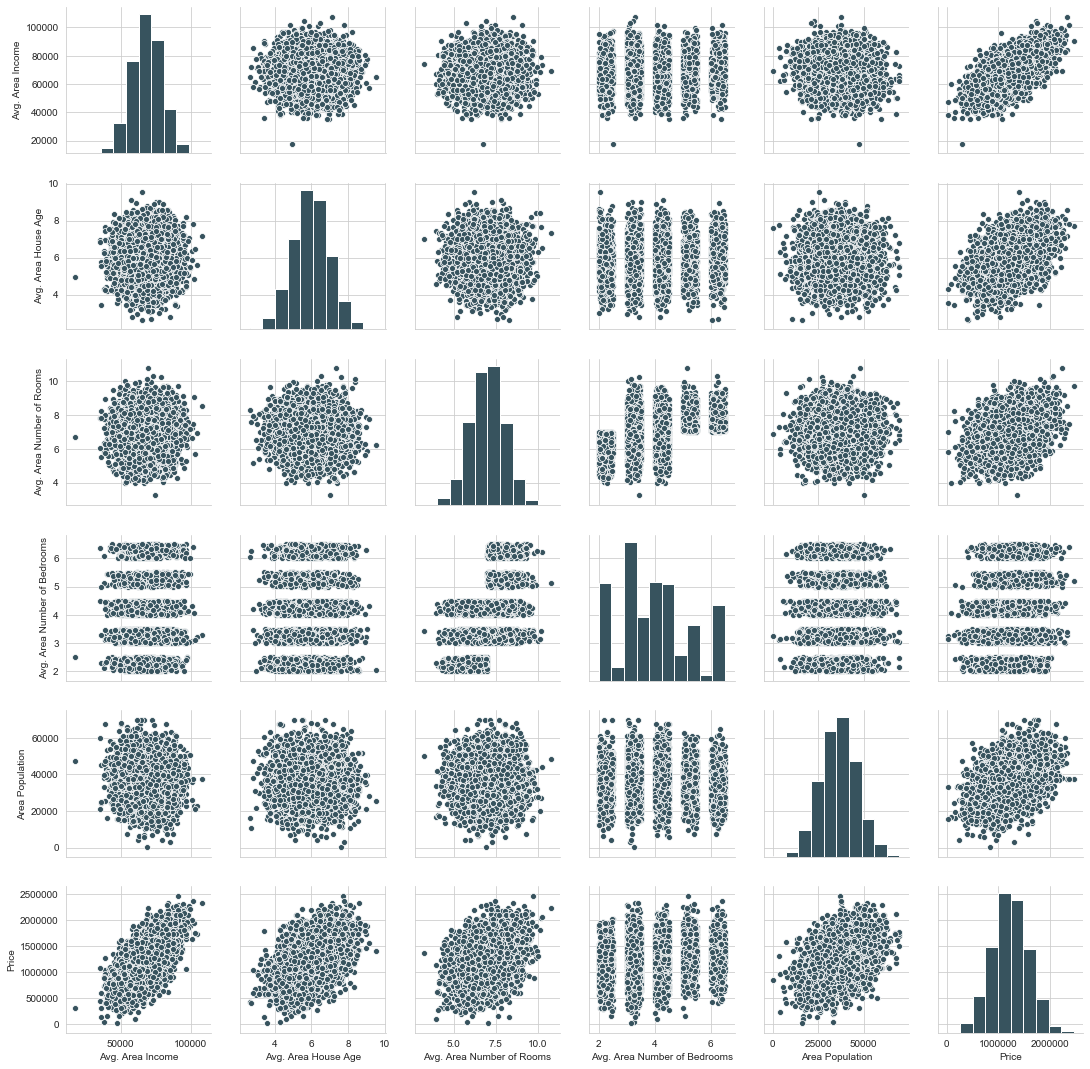

In [107]:
sns.pairplot(USAhousing)

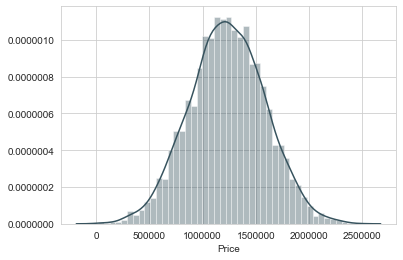

In [108]:
sns.distplot(USAhousing['Price'])


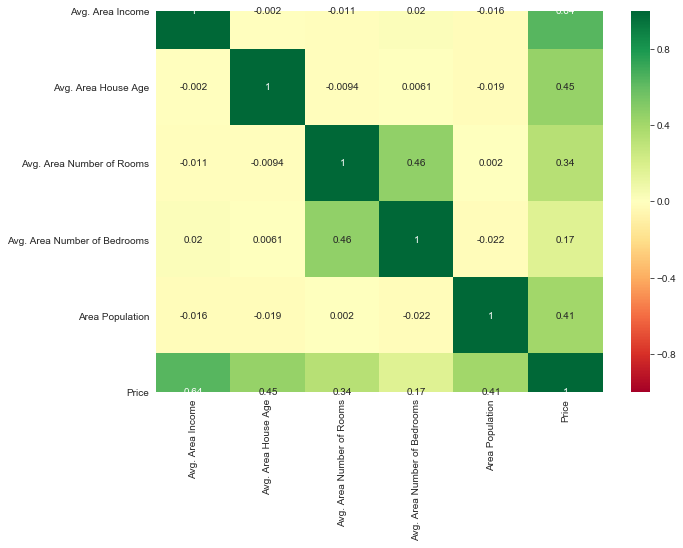

In [109]:
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(USAhousing.corr(), cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [110]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lm = LinearRegression()

In [115]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [116]:
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [117]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [118]:
predictions = lm.predict(X_test)

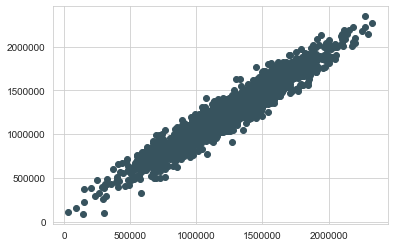

In [119]:
plt.scatter(y_test,predictions)

**Residual Histogram**

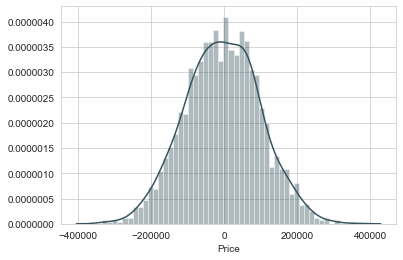

In [120]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [121]:
from sklearn import metrics

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153



# Linear Regression Project - Exercises

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [124]:
customers = pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [125]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [126]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [127]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [128]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

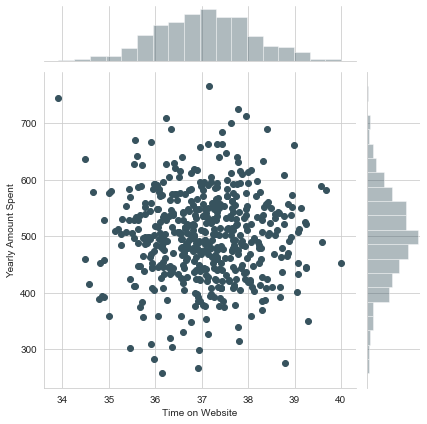

In [129]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

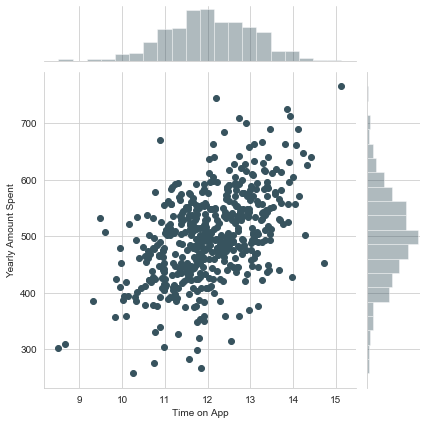

In [130]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

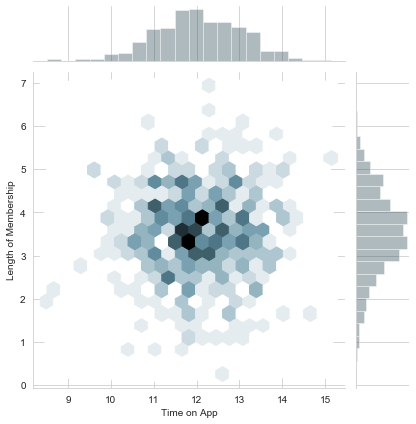

In [131]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

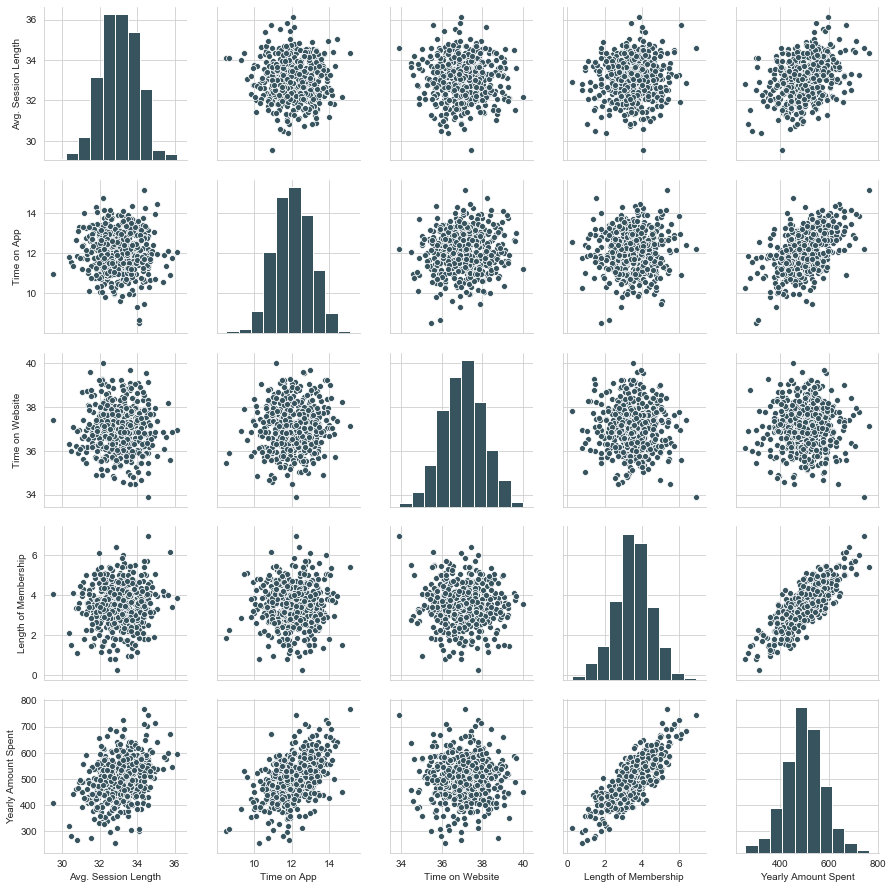

In [132]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# Length of Membership 

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

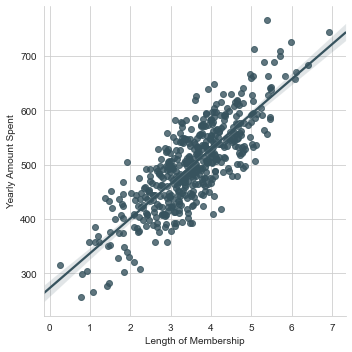

In [133]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [134]:
y = customers['Yearly Amount Spent']

In [135]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [140]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [141]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [142]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [143]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

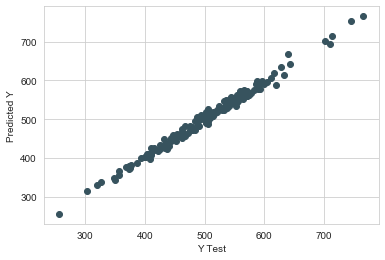

In [144]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [145]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

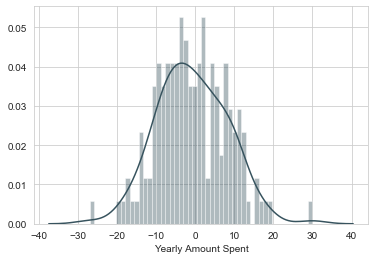

In [146]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [147]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

Congrats on your contract work! The company loved the insights! Ironnhack and Marc are delighted. Let's move on.